In [1]:
import time
import wandb
import torch


from utils.evaluating import show_images
from utils.datasets import create_dataset_folder, make_loaders
from models.conv_autoencoder import ConvAutoencoder
from utils.training import Logger, trainer

%matplotlib inline

# Подготовка данных

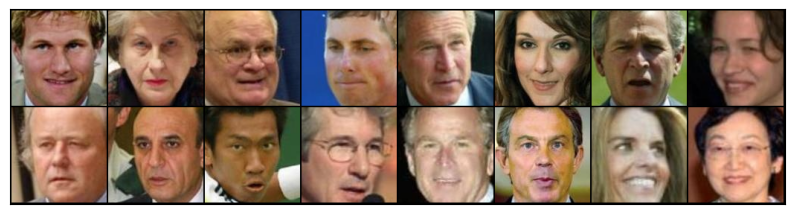

In [2]:
# # Парсим данные если их нет
# create_dataset_folder()

# Формируем train/test выборки
train, test = make_loaders()

# Посмотрим на изображения 
show_images(next(iter(train))[0], nrow=8)

# Инициализация гиперпараметров

In [11]:
# Файл с конфигурацией экспериментов
sweep_config = {
    "name": f"Sweep_{int(time.time())}",
    'method': 'random'
}

# задаём метрику и че с ней делать
sweep_config['metric'] = {
    'name': 'Loss on TEST', 
    'goal': 'minimize'
}

# Задаём набор гиперпараметров для обучения
sweep_config['parameters'] = {
    'num_blocks': {'values': [4, 5, 6]},
    'latent_size': {'values': [256, 512, 1024]},
    'learning_rate': {'value': 1e-3},
    'epochs': {'value': 1},
}

# После того как всё задано, создадим sweep и получим его id
sweep_id = wandb.sweep(sweep_config, project="AE_playground")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: fwu1zi9y
Sweep URL: https://wandb.ai/grafikxxxxxxxyyyyyyyyyyy/AE_playground/sweeps/fwu1zi9y


# Функция для запуска экспериментов

In [12]:
# Определим функцию для обучения и логгирования модели
def run (hyperparams=None):
    # Происходит инициализация параметров обучения
    with wandb.init(config=hyperparams):
        config = wandb.config
        
        # Инициализируем loader'ы
        train, test = make_loaders()
        
        # Определяем функцию потерь 
        loss_function = torch.nn.MSELoss()
        
        # Определяем оптимизатор
        optimizer = torch.optim.Adam
        
        # Инициализируем модель
        myModel = ConvAutoencoder(channels=3, 
                                  latent_dim=config.latent_size, 
                                  num_blocks=config.num_blocks, 
                                  hidden=32, 
                                  img_size=128)
        
        # Инициализируем трекинг модели
        wandb.watch(myModel, loss_function, log="all", log_freq=100)
        
        # Инициализируем логгер
        logger = Logger(test, loss_function)
        
        # Запускаем процесс обучения модели
        trainer(train, myModel, optimizer, loss_function, config.epochs, config.learning_rate, logger)

# Запуск sweep

In [ ]:
wandb.agent(sweep_id, run, count=9)

wandb: Agent Starting Run: a16mray7 with config:
wandb: 	epochs: 1
wandb: 	latent_size: 256
wandb: 	learning_rate: 0.001
wandb: 	num_blocks: 4
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: grafikxxxxxxxyyyyyyyyyyy. Use `wandb login --relogin` to force relogin


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Loss on TEST,█▅▃▂▁▁
Loss on TRAIN,█▅▆▅▅▄▄▄▄▃▄▃▃▂▂▂▃▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss on TEST,0.01063
Loss on TRAIN,0.0183


wandb: Agent Starting Run: qz353nyv with config:
wandb: 	epochs: 1
wandb: 	latent_size: 1024
wandb: 	learning_rate: 0.001
wandb: 	num_blocks: 4
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Loss on TEST,█▆▃▂▁▁
Loss on TRAIN,█▇▆▆▆▇▇▆▅▅▅▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▂▂▁▁▂▁▁▁▁▁
Loss on TEST,0.01328
Loss on TRAIN,0.0129


wandb: Agent Starting Run: xvhdqb5n with config:
wandb: 	epochs: 1
wandb: 	latent_size: 512
wandb: 	learning_rate: 0.001
wandb: 	num_blocks: 5
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Loss on TEST,█▅▃▂▁▁
Loss on TRAIN,█▆▆▅▄▅▄▃▄▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▂▁▁▁▁▁
Loss on TEST,0.01396
Loss on TRAIN,0.01279


wandb: Agent Starting Run: vaq4izfc with config:
wandb: 	epochs: 1
wandb: 	latent_size: 256
wandb: 	learning_rate: 0.001
wandb: 	num_blocks: 4
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# # Инициализируем loader'ы
# train, test = make_loaders()

# # Определяем функцию потерь 
# loss_function = torch.nn.MSELoss()

# # Определяем оптимизатор
# optimizer = torch.optim.Adam

# # Инициализируем модель
# myModel = ConvAutoencoder(channels=3, 
#                           latent_dim=256, 
#                           num_blocks=5, 
#                           hidden=32, 
#                           img_size=128)

# myModel

# # Инициализируем логгер
# # logger = Logger(test, loss_function)

# # Запускаем процесс обучения модели
# # trainer(train, myModel, optimizer, loss_function, 1, 1e-3, None)

In [ ]:
# import matplotlib.pyplot as plt
# from torchvision.utils import make_grid

# real = next(iter(train))[0]
# pred = myModel(real)

# # show_images(real, nrow=8)
# # show_images(pred, nrow=8)
# r = make_grid(real[ :min(len(real), int(4**2))], 4).permute(1,2,0)
# pred = make_grid(pred[ :min(len(pred), int(4**2))], 4).permute(1,2,0)

# plt.subplot(1, 2, 1)
# plt.imshow(r)

# plt.subplot(1, 2, 2)
# plt.imshow(pred)